141/141 [==============================] - 2s 6ms/step - loss: 7.1493e-04
Test Loss: 0.0007149295997805893
141/141 [==============================] - 3s 8ms/step


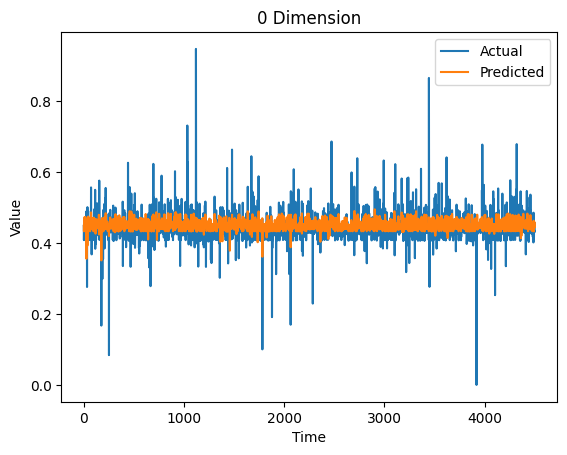

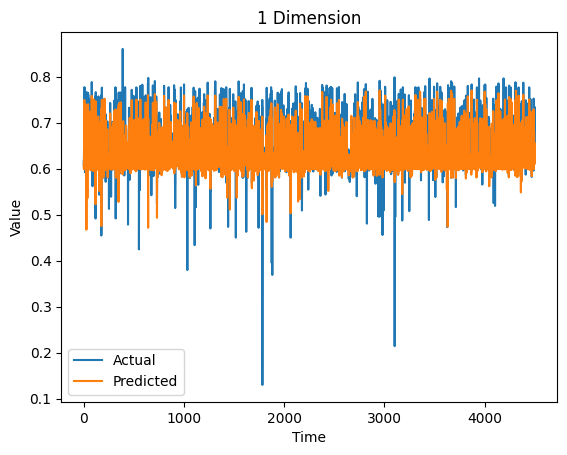

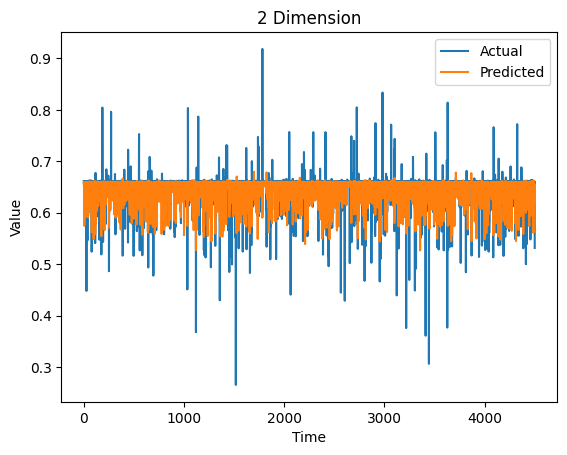

Enter interval for plotting (in seconds): 10
141/141 [==============================] - 1s 6ms/step


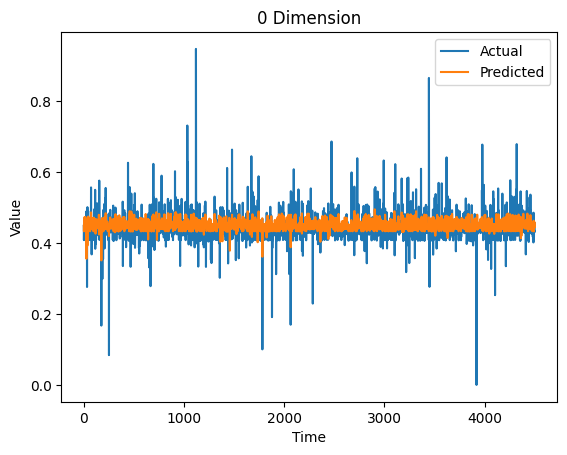

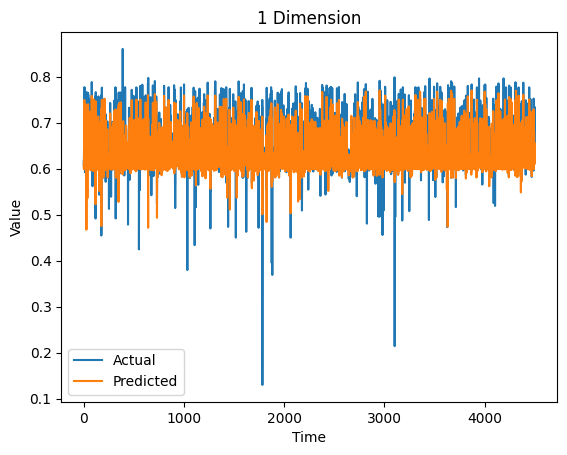

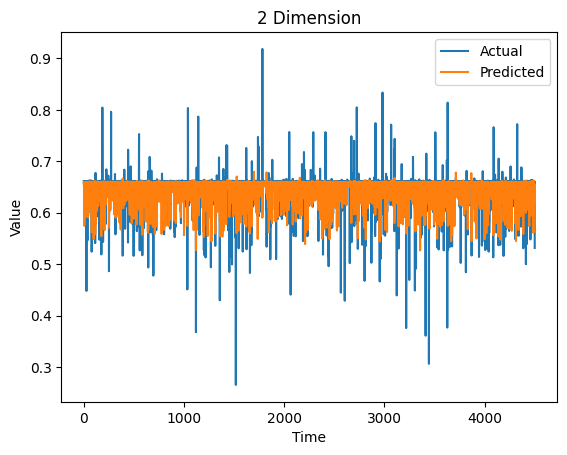

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


def upload_data(file_path):
    data = pd.read_csv(file_path)
    return data


def normalize_data(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_scaled = scaler.fit_transform(X)
    return X_scaled


def generate_sequences(X, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(X[i + time_steps])
    return np.array(Xs), np.array(ys)


def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=3))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


def train_model(model, X_train, y_train, epochs=1, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model


def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss}')


def plot_results(actual, predicted, dimension):
    plt.plot(actual[:, dimension], label='Actual')
    plt.plot(predicted[:, dimension], label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{dimension} Dimension')
    plt.legend()
    plt.show()


def get_user_interval():
    interval = int(input("Enter interval for plotting (in seconds): "))
    time_steps_interval = interval // 1
    return time_steps_interval


def main():
    file_path = "sensor_database-sensor_data.csv"
    data = upload_data(file_path)
    X = data[['xValue', 'yValue', 'zValue']].values

    X_scaled = normalize_data(X)

    time_steps = 10
    X_time, y_time = generate_sequences(X_scaled, time_steps)

    X_train, X_test, y_train, y_test = train_test_split(X_time, y_time, test_size=0.2, random_state=42)

    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    model = train_model(model, X_train, y_train, epochs=1, batch_size=32)

    evaluate_model(model, X_test, y_test)

    y_pred = model.predict(X_test)

    plot_results(y_test, y_pred, 0)
    plot_results(y_test, y_pred, 1)
    plot_results(y_test, y_pred, 2)

    time_steps_interval = get_user_interval()

    X_interval, y_interval = generate_sequences(X_scaled, time_steps_interval)
    X_train_interval, X_test_interval, y_train_interval, y_test_interval = train_test_split(X_interval, y_interval, test_size=0.2, random_state=42)

    y_pred_interval = model.predict(X_test_interval)

    plot_results(y_test_interval, y_pred_interval, 0)
    plot_results(y_test_interval, y_pred_interval, 1)
    plot_results(y_test_interval, y_pred_interval, 2)


if __name__ == "__main__":
    main()
